In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras.layers import Dense
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from glob import glob
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
training_dir = '/content/drive/MyDrive/PDI_CNN_NORMAL/train/'
validation_dir = '/content/drive/MyDrive/PDI_CNN_NORMAL/test/'
#test_dir = '/content/drive/MyDrive/IMAGENES_PROYECTO_PDI/test/'

In [ ]:
print(len(next(os.walk(training_dir))[1]))

2


In [ ]:
my_list = os.listdir(training_dir)
print(my_list)

['manzana', 'banano']


In [ ]:
vgg = VGG16()

In [ ]:
print(vgg.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg_layer_list = vgg.layers
print(len(vgg_layer_list))

23


In [ ]:
model = Sequential()
for i in range(len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])
    #model.add(Dropout(0.5))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
numberOfClass = 2

for layers in model.layers:
    layers.trainable = False

model.add(Dense(numberOfClass,activation="softmax"))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
model_layer_list = model.layers
print(len(model_layer_list))

22


In [ ]:
model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

train_data = ImageDataGenerator().flow_from_directory(training_dir,target_size=(224,224))

test_data = ImageDataGenerator().flow_from_directory(validation_dir,target_size=(224,224))

Found 600 images belonging to 2 classes.
Found 620 images belonging to 2 classes.


In [ ]:
batch_size=64
hist = model.fit_generator(train_data,
                           steps_per_epoch=1200//batch_size,
                           epochs=10,
                           validation_data=test_data,
                           validation_steps=600//batch_size)

<ipython-input-67-a42080663086>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/10
18/18 [==============================] - 108s 6s/step - loss: 0.3796 - accuracy: 0.9120 - val_loss: 0.0389 - val_accuracy: 0.9931
Epoch 2/10
18/18 [==============================] - 45s 3s/step - loss: 0.0443 - accuracy: 0.9824 - val_loss: 0.0403 - val_accuracy: 0.9931
Epoch 3/10
18/18 [==============================] - 40s 2s/step - loss: 0.0208 - accuracy: 0.9912 - val_loss: 0.0241 - val_accuracy: 0.9931
Epoch 4/10
18/18 [==============================] - 29s 2s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 0.9931
Epoch 5/10
18/18 [==============================] - 30s 2s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0605 - val_accuracy: 0.9896
Epoch 6/10
18/18 [==============================] - 25s 1s/step - loss: 9.1969e-04 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9931
Epoch 7/10
18/18 [==============================] - 29s 2s/step - loss: 0.0082 - accuracy: 0.9965 - val_loss: 0.0219 - val_accuracy: 0.9931
Epoch 8/10
18/1

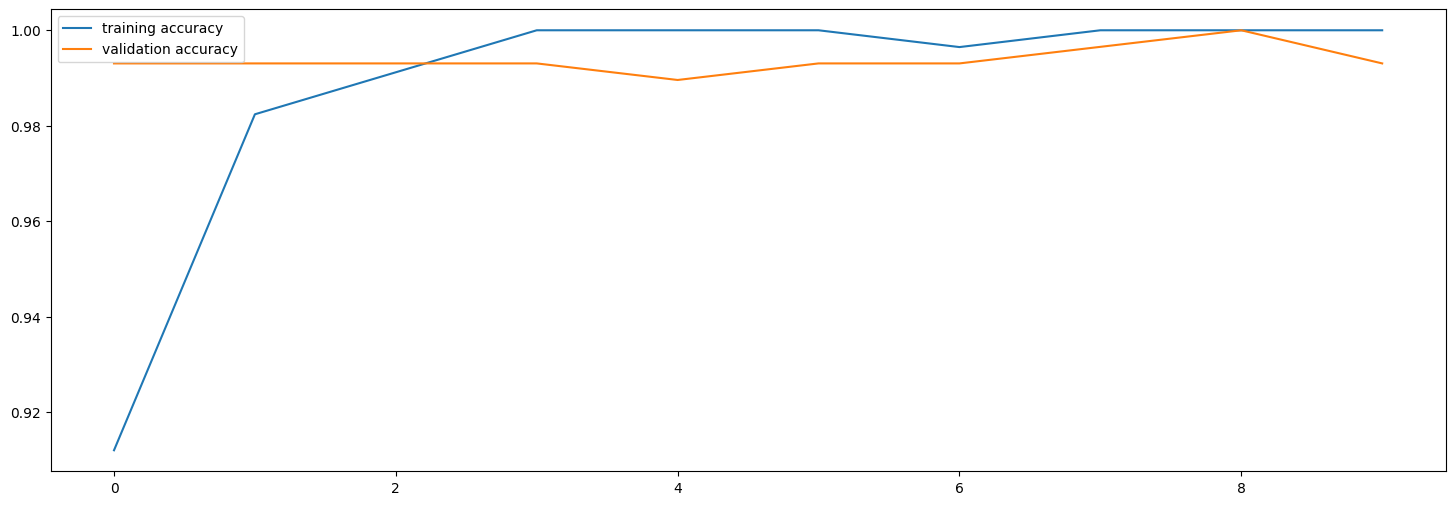

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(hist.history["accuracy"],label="training accuracy")
plt.plot(hist.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show();

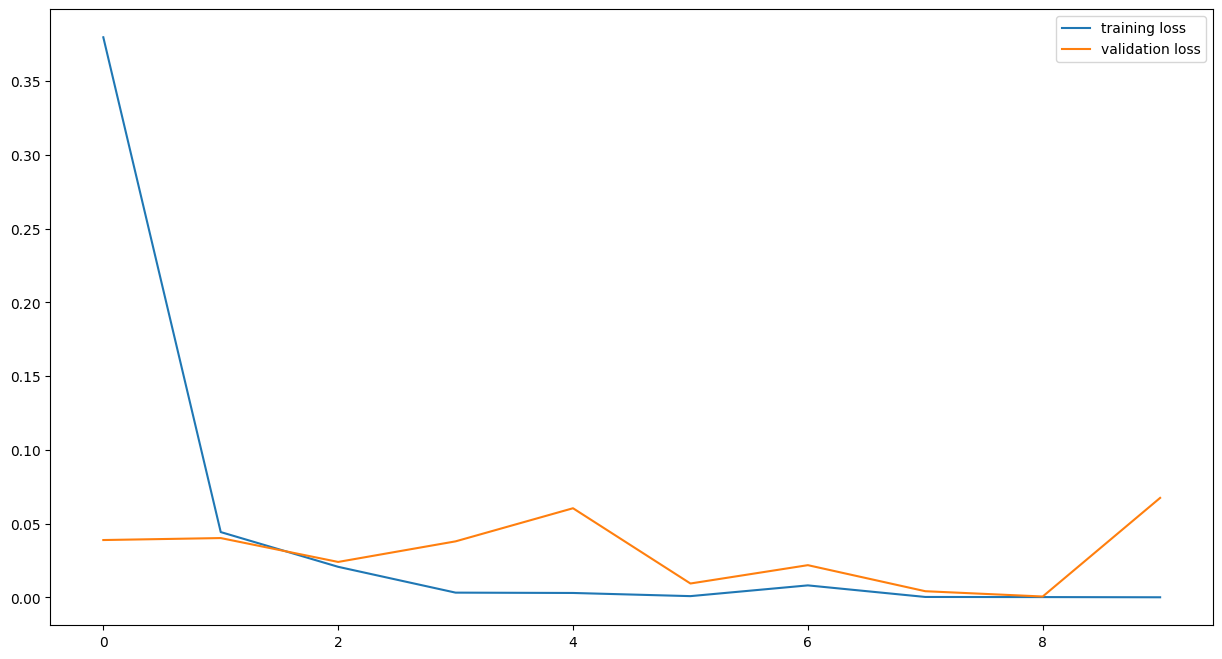

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(hist.history["loss"],label="training loss")
plt.plot(hist.history["val_loss"],label="validation loss")
plt.legend()
plt.show();

In [ ]:
print("Model accuracy is: ",hist.history["accuracy"][-1])

Model accuracy is:  1.0


In [ ]:
idx_to_name = {x:i for (x,i) in enumerate(train_data.class_indices)}

def predict(img):
    to_predict = np.zeros(shape=train_data[0][0].shape)
    to_predict[0] = img

    return idx_to_name[np.argmax(model(to_predict)[0])]

In [ ]:
prueba = cv2.imread("/content/manzana-royal.jpg")

In [ ]:
resized = cv2.resize(prueba, (224,224), interpolation = cv2.INTER_AREA)

In [ ]:
#predict(resized)

In [ ]:
prediction = predict(resized)
print("Prediction:", prediction)

Prediction: manzana


20/20 [==============================] - 9s 424ms/step
Classification Metrics:
              precision    recall  f1-score   support

      banano       0.54      0.54      0.54       310
     manzana       0.54      0.54      0.54       310

    accuracy                           0.54       620
   macro avg       0.54      0.54      0.54       620
weighted avg       0.54      0.54      0.54       620

Confusion Matrix:
[[166 144]
 [144 166]]


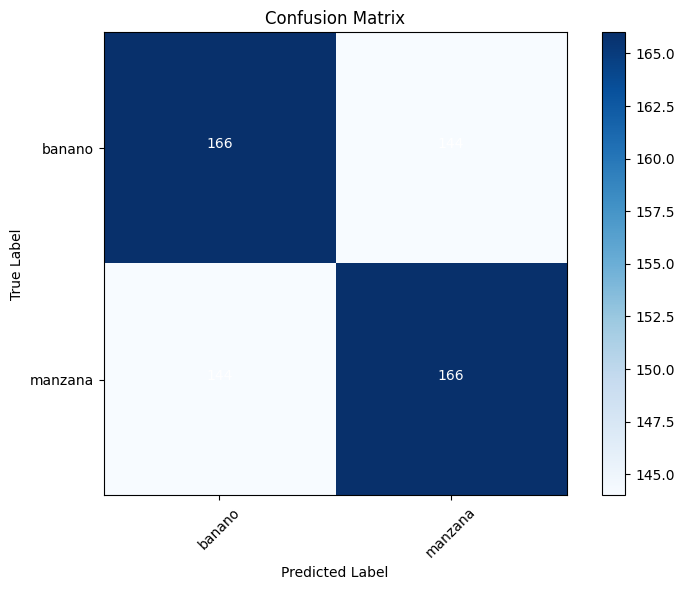

In [ ]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def calculate_metrics(model, test_data):
    # Calculate precision, recall, F1-score, and confusion matrix
    y_true = test_data.classes
    y_pred = model.predict(test_data).argmax(axis=1)
    class_names = list(test_data.class_indices.keys())

    classification_metrics = classification_report(y_true, y_pred, target_names=class_names)
    confusion_mat = confusion_matrix(y_true, y_pred)

    print("Classification Metrics:")
    print(classification_metrics)

    print("Confusion Matrix:")
    print(confusion_mat)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_mat, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Annotate each cell with the numeric value
    thresh = confusion_mat.max() / 2.
    for i, j in itertools.product(range(confusion_mat.shape[0]), range(confusion_mat.shape[1])):
        plt.text(j, i, format(confusion_mat[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_mat[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

# Call the function with your model and test data
calculate_metrics(model, test_data)


In [ ]:
model.save_weights("/content/drive/MyDrive/PDI_CNN_NORMAL/fruits_model_pesos.h5")

In [ ]:
model.save('/content/drive/MyDrive/PDI_CNN_NORMAL/fruits_model_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('/content/drive/MyDrive/PDI_CNN_NORMAL/mi_modelo.keras')

In [ ]:
model.save('/content/drive/MyDrive/PDI_CNN_NORMAL/mi_modelo_vgg16.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
import cv2
import numpy as np

# Cargar el modelo guardado
model = load_model('/content/drive/MyDrive/PDI_CNN_NORMAL/mi_modelo_vgg16.h5')

# Preprocesamiento de la imagen para la predicción
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
    img = np.expand_dims(img, axis=0)
    return img

# Función de predicción
def predict(model, img):
    img_array = preprocess_image(img)
    predictions = model.predict(img_array)
    idx = np.argmax(predictions)
    return idx_to_name[idx]

# Usar la función de predicción
image_path = "/content/21LOIB_ano.jpg"
prediction = predict(model, image_path)
print("Prediction:", prediction)


1/1 [==============================] - 0s 137ms/step
Prediction: banano


In [ ]:
from keras.models import load_model
import cv2
import numpy as np

# Cargar el modelo guardado
model = load_model('/content/drive/MyDrive/PDI_CNN_NORMAL/mi_modelo_vgg16.h5')

# Preprocesamiento de la imagen para la predicción
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
    img = np.expand_dims(img, axis=0)
    return img

# Función de predicción
def predict(model, img):
    img_array = preprocess_image(img)
    predictions = model.predict(img_array)
    idx = np.argmax(predictions)
    return idx  # Devuelve directamente el índice de la clase

# Usar la función de predicción
image_path = "/content/manzana-royal.jpg"
class_index = predict(model, image_path)
print("Índice de la clase predicha:", class_index)


In [ ]:
model.save_weights('/content/drive/MyDrive/PDI_CNN_NORMAL/mi_modelo_vgg16_pesos.h5')